# Time Series Analysis

In [13]:
%matplotlib inline

# Ignore deprecated warning
import warnings
warnings.filterwarnings("ignore")

# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from pylab import rcParams

# Set font scale and style
plt.rcParams.update({'font.size': 18})

# Stat models
from statsmodels.tsa.seasonal import seasonal_decompose

In [14]:
# import custom class
%run -i '../src/helper/ts_analysis.py'

In [15]:
# Instantiate the class
fxn = TimeSeriesAnalysis()

# Load  data

In [18]:
ts = pd.read_csv('../data/ts_yearly.csv') # load data
ts.year = pd.to_datetime(ts['year'], format = '%Y')  # convert to datetime
ts.index = ts.year # make date the dataframe index
ts = ts.drop(['year'], axis =1)

print("Data size:", ts.shape)
ts.head()

Data size: (122, 1)


,tot_occurrence
year,
1959-01-01,33
1990-01-01,303
1903-01-01,12
1975-01-01,67
1977-01-01,141


# Missing values
There are no missing values in the time series data

In [19]:
ts.isnull().sum() 

tot_occurrence    0
dtype: int64

# Time series plot

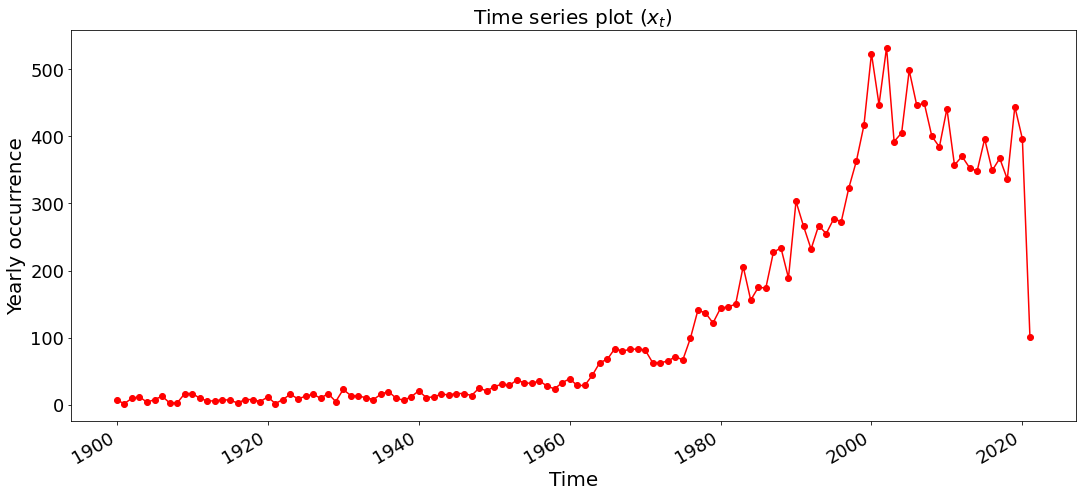

In [21]:
fxn.plot_timeseries(ts.tot_occurrence, marker= 'o', color = 'r', title = 'Time series plot ($x_t$)')

# Stationarity test (Dickey-Fuller Test)

The time series is stationary and the null hypothesis can be rejected as the test statistic is less than the critical values and the p-value is less than 0.05. Another way to test for the stationarity of a time series is to plot the autocorrelation function (ACF). For a stationary time series the ACF  decays exponentially to 0 as lag increases.  The plot of ACF above shows that the time series is stationary.

Test statistic: -11.474322525355603
p-value: 5.1752995522491205e-21
Critial Values (1%): -3.485585
Critial Values (5%): -2.885739
Critial Values (10%): -2.579676


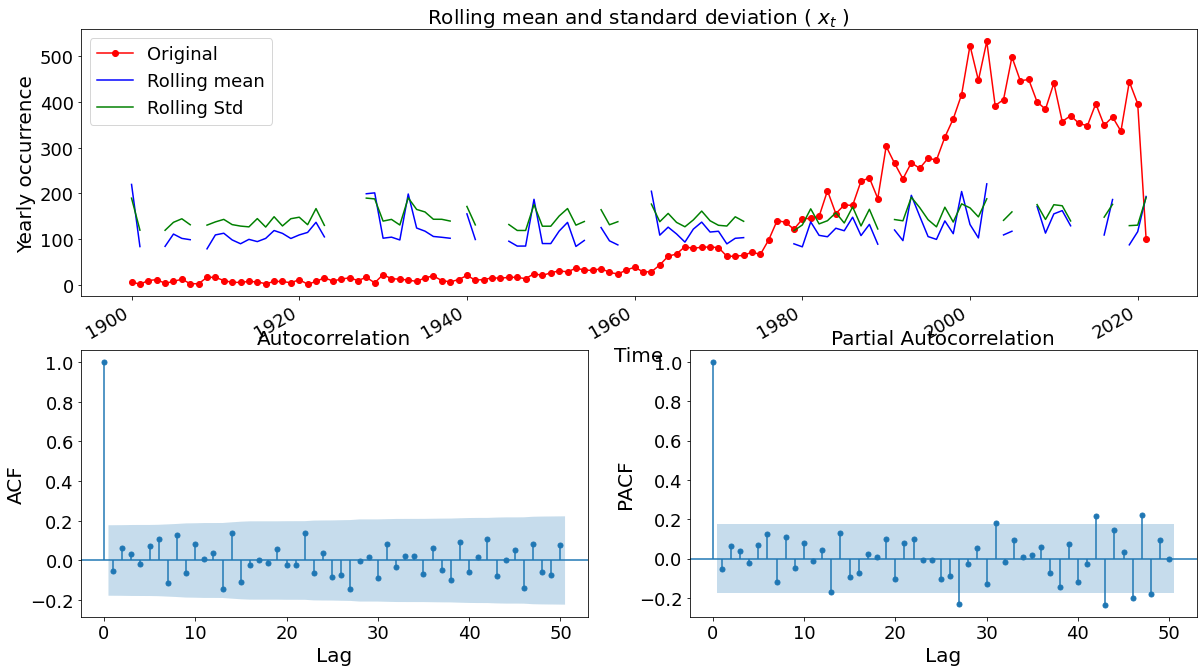

In [22]:
plt.figure(figsize=(20, 12))
fxn.plot_ts(ts.tot_occurrence, title = 'Rolling mean and standard deviation ( $x_t$ )', nlags = 50)